In [2]:
from ROOT import TCanvas
from ROOT import TH1F, TLine
from ROOT import gStyle
from array import array
import math
import numpy as np
import time
import random

c1 = TCanvas( 'c1', 'Random Number Generator', 0, 0, 1200, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(2,1)

Welcome to JupyROOT 6.28/00


In [3]:
def seedLCG(initVal):
    global rand
    rand = initVal
    
def rand_ejb():
    a = 16807
    m = 2147483647
    b = 0
    global rand
    
    rand = (a*rand + b) % m
    return rand/m

In [4]:
npoints = 10000000
iseed = 1
nbins = 100

seedLCG(iseed)
h1 = TH1F("h1","Random Number Generation EJB",nbins,0.0,1.0)
h2 = TH1F("h2","Random Number Generation Python",nbins,0.0,1.0)

random.seed(iseed)

ticks = time.time()
for i in range(0,npoints):
    r = rand_ejb()
    #print (i,r)
    h1.Fill(r,1.0*nbins/npoints) 
ticks2 = time.time()
print ("elapsed time = %.3f" % (ticks2-ticks))

ticks3 = time.time()
for i in range(0,npoints):
    r2 = random.uniform(0.0,1.0)
    #print (i,r)
    h2.Fill(r2,1.0*nbins/npoints) 
ticks4 = time.time()
print ("elapsed time = %.3f" % (ticks4-ticks3))


elapsed time = 19.814
elapsed time = 18.425


Three-sigma Error = 0.009487


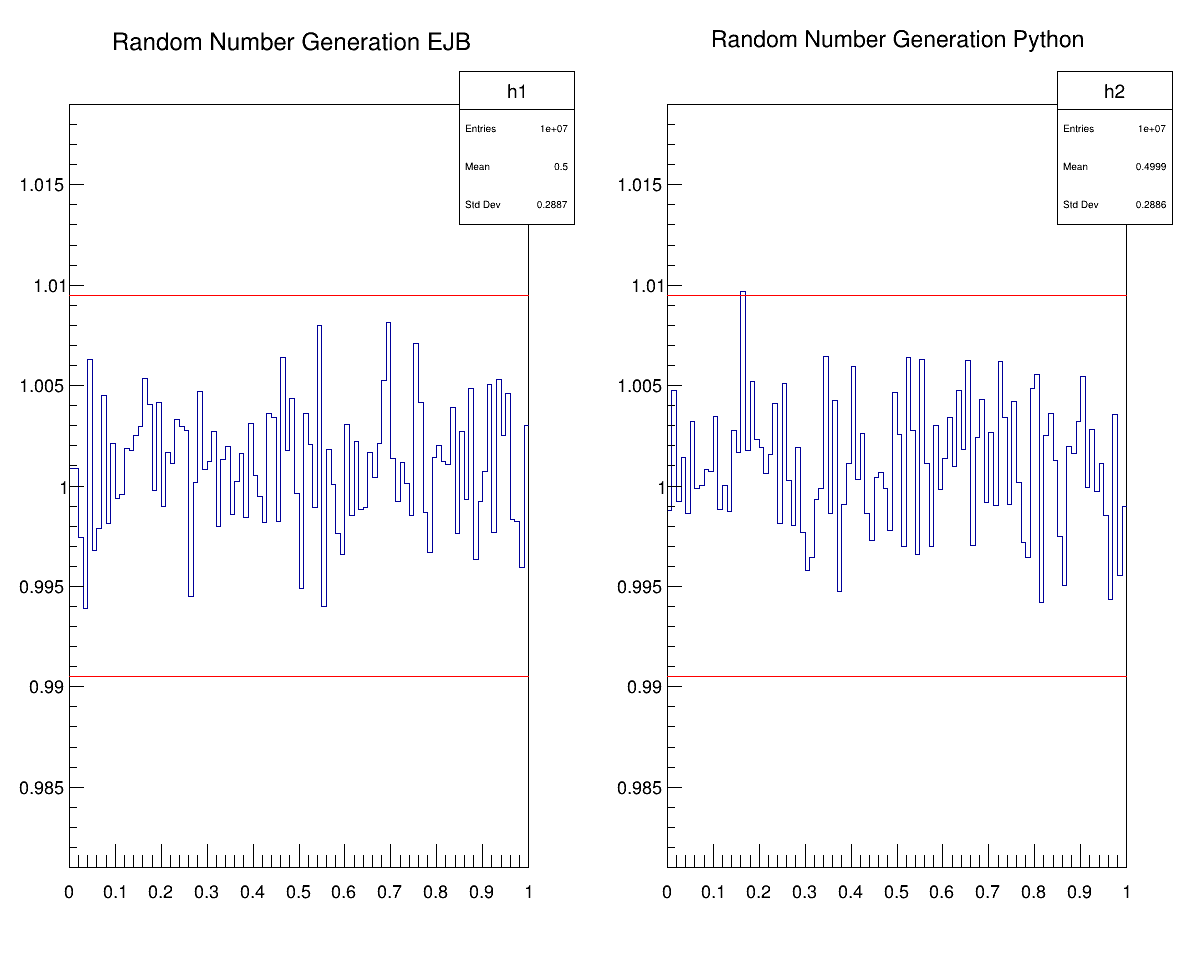

In [7]:
error = 3.0/math.sqrt(npoints/nbins)
print ("Three-sigma Error = %f" % error)
topline = TLine(0,1+error,1,1+error)
bottomline = TLine(0,1-error,1,1-error)
topline.SetLineColor(2)
bottomline.SetLineColor(2)

h1.GetYaxis().SetRangeUser(1-2*error, 1.0+2*error);
h2.GetYaxis().SetRangeUser(1-2*error, 1.0+2*error);

c1.cd(1)
h1.Draw("HIST")
topline.Draw("SAME")
bottomline.Draw("SAME")
c1.cd(2)
h2.Draw("HIST")
topline.Draw("SAME")
bottomline.Draw("SAME")
c1.Draw()
